In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import time
import pathlib
project_path = pathlib.Path('.').absolute().parent
os.sys.path.insert(1, str(project_path))

In [3]:
import typing
import numpy as np
import cv2
from trifinger_simulation import sim_finger, sample, camera

pybullet build time: Jul 21 2022 19:50:14


In [4]:
import omegaconf
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image
from r3m import load_r3m

In [5]:
import trifinger_envs

In [6]:
env = trifinger_envs.cube_env.SimCubeEnvNYU(enable_cameras=True, visualization=True)

In [7]:
obs = env.reset()

In [8]:
env.close()

In [9]:
image = obs['camera_observation']['camera60']['image']

In [10]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

r3m = load_r3m("resnet50")  # resnet18, resnet34
r3m.eval()
r3m.to(device);

/home/hz/anaconda3/envs/eaif/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/home/hz/anaconda3/envs/eaif/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/hz/anaconda3/envs/eaif/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/hz/anaconda3/envs/eaif/lib/python3.8/site-packages/torch/nn/parallel/data_parallel.py:30: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 1 which
    has less than 75% of the memory or cores of GPU 0. Y

In [11]:
transforms = T.Compose(
    [T.Resize(256), T.CenterCrop(224), T.ToTensor()]
)  # ToTensor() divides by 255
preprocessed_image = transforms(Image.fromarray(image.astype(np.uint8))).reshape(
    -1, 3, 224, 224
)

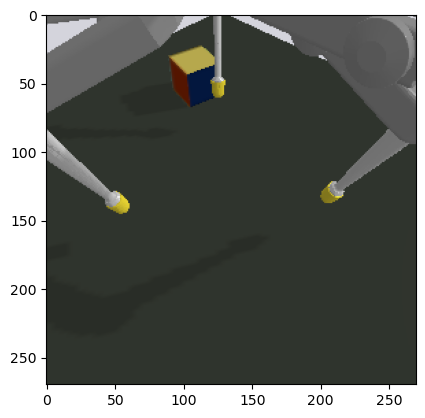

In [12]:
plt.imshow(image)
plt.show()

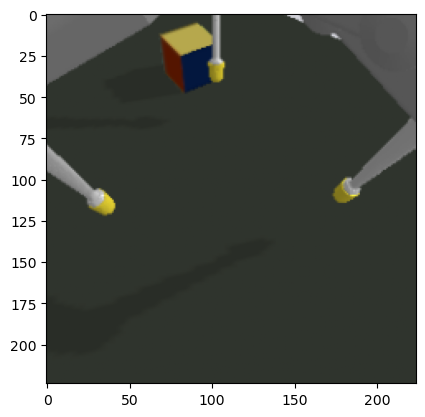

In [13]:
plt.imshow(preprocessed_image[0].transpose(0, 2).transpose(0, 1))
plt.show()

In [14]:
with torch.no_grad():
    embedding = r3m(
        preprocessed_image * 255.0
    )  ## R3M expects image input to be [0-255]
print(embedding.shape)  # [1, 2048]

torch.Size([1, 2048])
